In [67]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#importing training data from train.csv

titanic = pd.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#importing testing data from test.csv

titanic_test = pd.read_csv('test.csv')


titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
 titanic.shape

(891, 12)

In [71]:
titanic_test.shape

(418, 11)

In [72]:
#statistitcal analysis of training dataset

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
# checking the balance of the training dataset

titanic['Survived'].value_counts()



0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

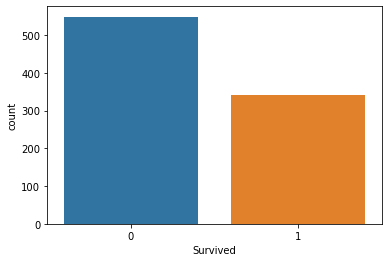

In [74]:
sns.countplot( titanic['Survived'] )

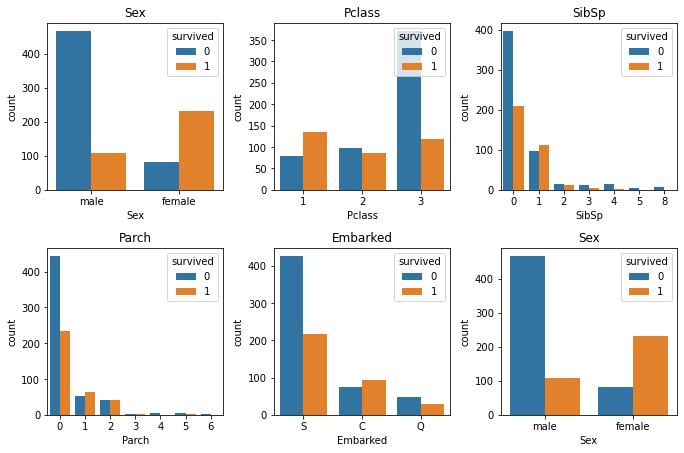

In [75]:
# checking survival for different columns

cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows*3.2))

for r in range(0, n_rows):
    for c in range (0, n_cols):
        
        i = (r*n_cols) + c
        
        ax = axs[r][c]
        sns.countplot (titanic [cols[i]], hue = titanic ['Survived'], ax=ax)
        ax.set_title (cols[i])
        ax.legend(title = 'survived', loc= 'upper right')
        
plt.tight_layout()
        

In [76]:
# checking percentage of survival according to sex

titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [77]:
# checking percentage of survival according to sex and Passenger Class

titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

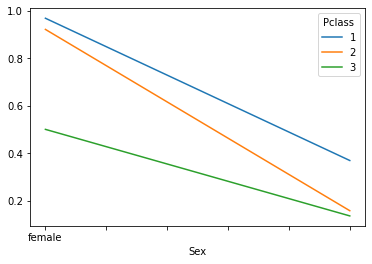

In [78]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

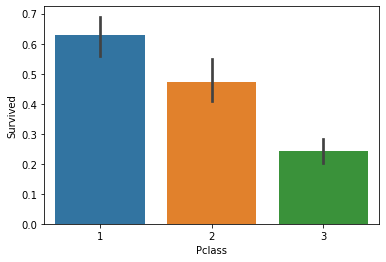

In [79]:
#checking percentage of survival according to Passenger class

sns.barplot(x='Pclass', y='Survived', data = titanic)

In [80]:
# data binning, checking survival rate for sex and passanger class in different age category (bins)

age = pd.cut(titanic['Age'], [0,18,80])
titanic.pivot_table('Survived', ['Sex', age] , 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [81]:
# checking for missing values in training data

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
#checking for missing values in testing data

titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
#Encoding categorical data

from sklearn.preprocessing import LabelEncoder
category_cols=['Sex','Embarked']
le=LabelEncoder()
titanic[category_cols]=titanic[category_cols].apply(le.fit_transform)

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [85]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [86]:
# dropping the "Cabin" column from the dataframe
titanic = titanic.drop(columns='Cabin', axis=1)

In [87]:
# replacing the missing values in the "Age" column by the average value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [88]:
# printing the mode of column "Embarked". Mode is the most frequent value in this column
print(titanic['Embarked'].mode())

0    2
dtype: int32


In [89]:
# replacing the missing values in column "Embarked" with its mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [90]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [92]:
titanic.shape

(891, 11)

In [93]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [94]:
# replacing the missing values in the "Age" column by the average value
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)

In [95]:
# dropping the "Cabin" column from the dataframe
titanic_test = titanic_test.drop(columns='Cabin', axis=1)

In [96]:
## replacing the missing values in the "Fare" column by the average value
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

In [97]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
titanic_test.shape

(418, 10)

In [99]:
#splitting the data

X = titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)
Y = titanic['Survived']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [101]:
## checking distribution of survived variable in train test split
print('Distribution of Survived variable in training set')
print(Y_train.value_counts())

print('Distribution of Survived variable in test set')
print(Y_test.value_counts())

Distribution of Survived variable in training set
0    449
1    263
Name: Survived, dtype: int64
Distribution of Survived variable in test set
0    100
1     79
Name: Survived, dtype: int64


In [102]:
#normalization of numerical data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,1,0.560782,0,0,0.054107,0
10,3,0,0.050723,1,1,0.032596,2
873,3,1,0.659960,0,0,0.017567,2
182,3,1,0.121564,4,2,0.061264,2
876,3,1,0.277416,0,0,0.019218,2


In [103]:
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

In [104]:
#logistic regression
lg_reg = LogisticRegression(penalty='l2')
lg_reg.fit(X_train,Y_train)
y_pred_lgreg = lg_reg.predict(X_test)

In [105]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,Y_train)
y_pred_gb = gb.predict(X_test)

In [106]:
#svm
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,Y_train)
y_pred_svc = svc.predict(X_test)

In [107]:
#svm rbf
svc_rbf = SVC(kernel='rbf',gamma='auto',probability=True)
svc_rbf.fit(X_train,Y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)

In [108]:
#decision tree
decc = DecisionTreeClassifier()
decc.fit(X_train,Y_train)
y_pred_decc = decc.predict(X_test)

In [109]:
#random forest
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, Y_train)
y_pred_rfe = rf_ent.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Logistic Regression,0.569832,0.5625,0.113924,0.93,0.189474,0.521962,14.857494,0.076447


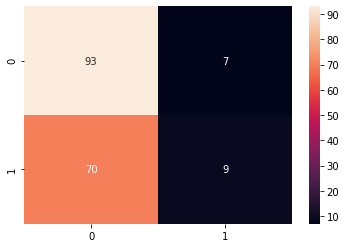

In [110]:
CM=confusion_matrix(Y_test,y_pred_lgreg)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_lgreg)
acc= accuracy_score(Y_test, y_pred_lgreg)
roc=roc_auc_score(Y_test, y_pred_lgreg)
prec = precision_score(Y_test, y_pred_lgreg)
rec = recall_score(Y_test, y_pred_lgreg)
f1 = f1_score(Y_test, y_pred_lgreg)

mathew = matthews_corrcoef(Y_test, y_pred_lgreg)
model_results =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Naive Bayes,0.441341,0.441341,1.0,0.0,0.612403,0.5,19.295853,0.0


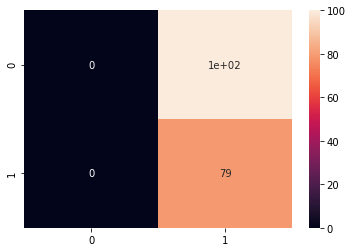

In [111]:
CM=confusion_matrix(Y_test,y_pred_gb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_gb)
acc= accuracy_score(Y_test, y_pred_gb)
roc=roc_auc_score(Y_test, y_pred_gb)
prec = precision_score(Y_test, y_pred_gb)
rec = recall_score(Y_test, y_pred_gb)
f1 = f1_score(Y_test, y_pred_gb)

mathew = matthews_corrcoef(Y_test, y_pred_gb)
model_results =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Support Vector Classifier Linear,0.636872,0.558333,0.848101,0.47,0.673367,0.659051,12.542251,0.336018


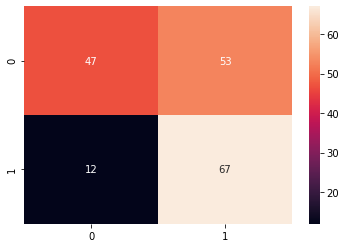

In [112]:
CM=confusion_matrix(Y_test,y_pred_svc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_svc)
acc= accuracy_score(Y_test, y_pred_svc)
roc=roc_auc_score(Y_test, y_pred_svc)
prec = precision_score(Y_test, y_pred_svc)
rec = recall_score(Y_test, y_pred_svc)
f1 = f1_score(Y_test, y_pred_svc)

mathew = matthews_corrcoef(Y_test, y_pred_svc)
model_results =pd.DataFrame([['Support Vector Classifier Linear',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Support Vector Classifier RBF,0.558659,0.0,0.0,1.0,0.0,0.5,15.243371,0.0


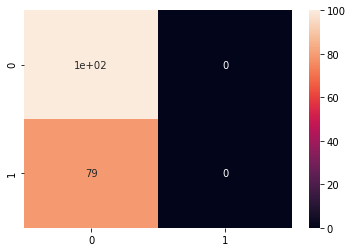

In [113]:
CM=confusion_matrix(Y_test,y_pred_svc_rbf)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_svc_rbf)
acc= accuracy_score(Y_test, y_pred_svc_rbf)
roc=roc_auc_score(Y_test, y_pred_svc_rbf)
prec = precision_score(Y_test, y_pred_svc_rbf)
rec = recall_score(Y_test, y_pred_svc_rbf)
f1 = f1_score(Y_test, y_pred_svc_rbf)

mathew = matthews_corrcoef(Y_test, y_pred_svc_rbf)
model_results =pd.DataFrame([['Support Vector Classifier RBF',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Decision Tree,0.743017,0.971429,0.43038,0.99,0.596491,0.71019,8.875891,0.526308


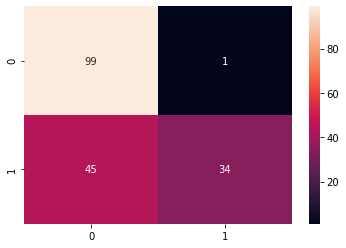

In [114]:
CM=confusion_matrix(Y_test,y_pred_decc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_decc)
acc= accuracy_score(Y_test, y_pred_decc)
roc=roc_auc_score(Y_test, y_pred_decc)
prec = precision_score(Y_test, y_pred_decc)
rec = recall_score(Y_test, y_pred_decc)
f1 = f1_score(Y_test, y_pred_decc)

mathew = matthews_corrcoef(Y_test, y_pred_decc)
model_results =pd.DataFrame([['Decision Tree',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.776536,0.882353,0.56962,0.94,0.692308,0.75481,7.718189,0.076447


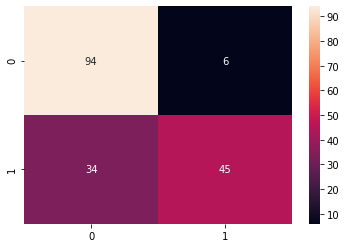

In [115]:
CM=confusion_matrix(Y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_rfe)
acc= accuracy_score(Y_test, y_pred_rfe)
roc=roc_auc_score(Y_test, y_pred_rfe)
prec = precision_score(Y_test, y_pred_rfe)
rec = recall_score(Y_test, y_pred_rfe)
f1 = f1_score(Y_test, y_pred_rfe)

mathew = matthews_corrcoef(Y_test, y_pred_lgreg)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

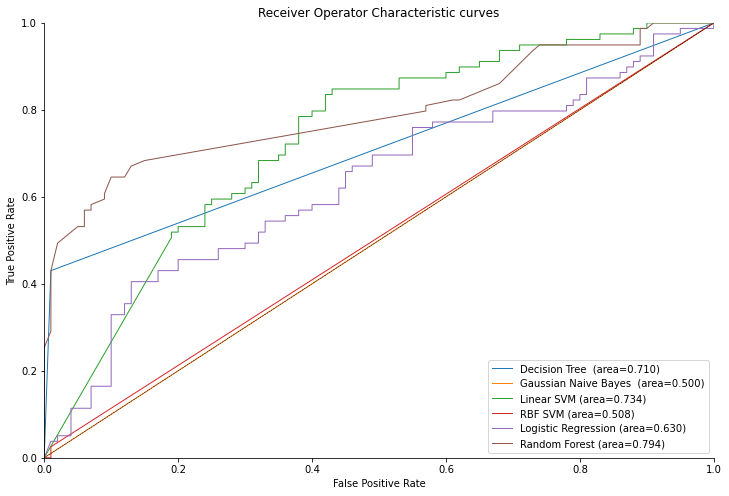

In [116]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(Y_test,decc.predict_proba(X_test),label='Decision Tree ',l='-')
roc_auc_plot(Y_test,gb.predict_proba(X_test),label='Gaussian Naive Bayes ',l='-')
roc_auc_plot(Y_test,svc.predict_proba(X_test),label='Linear SVM',l='-')
roc_auc_plot(Y_test,svc_rbf.predict_proba(X_test),label='RBF SVM',l='-')
roc_auc_plot(Y_test,lg_reg.predict_proba(X_test),label='Logistic Regression',l='-')
roc_auc_plot(Y_test,rf_ent.predict_proba(X_test),label='Random Forest',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

In [117]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [126]:
#testing data 

X_test = titanic_test.drop(columns = ['PassengerId','Name','Ticket'], axis=1)

In [127]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [128]:
from sklearn.preprocessing import LabelEncoder
category_cols=['Sex','Embarked']
le=LabelEncoder()
X_test[category_cols]=titanic[category_cols].apply(le.fit_transform)

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [131]:
#normalization of test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test[['Age','Fare']] = scaler.fit_transform(X_test[['Age','Fare']])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,2
1,3,0,0.617566,1,0,0.013663,0
2,2,0,0.815377,0,0,0.018909,2
3,3,0,0.353818,0,0,0.016908,2
4,3,1,0.287881,1,1,0.023984,2


In [132]:
# testing on test.csv data and saving the submission

ourPred  = rf_ent.predict(X_test)

testReal = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": testReal["PassengerId"],
        "Survived": ourPred
    })
submission.to_csv('submission.csv', index=False)
